In [22]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

# EXPLORATION DATA

In [23]:
price = pd.read_csv('get_around_pricing_project.csv')

In [24]:
print(f"The dataset shape is {price.shape}")
print("The dataset: ")
price.head()

The dataset shape is (4843, 15)
The dataset: 


,Unnamed: 0,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183


In [ ]:
print("Percentage of missing values: ")
display(100*price.isnull().sum()/price.shape[0])

Percentage of missing values: 


Unnamed: 0                   0.0
model_key                    0.0
mileage                      0.0
engine_power                 0.0
fuel                         0.0
paint_color                  0.0
car_type                     0.0
private_parking_available    0.0
has_gps                      0.0
has_air_conditioning         0.0
automatic_car                0.0
has_getaround_connect        0.0
has_speed_regulator          0.0
winter_tires                 0.0
rental_price_per_day         0.0
dtype: float64

In [ ]:
print("Basics statistics: ")
display(price.describe(include='all'))
print()

Basics statistics: 


,Unnamed: 0,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
count,4843.000000,4843,4.843000e+03,4843.00000,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843.000000
unique,NaN,28,NaN,NaN,4,10,8,2,2,2,2,2,2,2,NaN
top,NaN,Citroën,NaN,NaN,diesel,black,estate,True,True,False,False,False,False,True,NaN
freq,NaN,969,NaN,NaN,4641,1633,1606,2662,3839,3865,3881,2613,3674,4514,NaN
mean,2421.000000,NaN,1.409628e+05,128.98823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121.214536
std,1398.198007,NaN,6.019674e+04,38.99336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.568268
min,0.000000,NaN,-6.400000e+01,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000
25%,1210.500000,NaN,1.029135e+05,100.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.000000
50%,2421.000000,NaN,1.410800e+05,120.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.000000
75%,3631.500000,NaN,1.751955e+05,135.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136.000000


In [ ]:
price[price['mileage'] < 0]

,Unnamed: 0,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
2938,2938,Renault,-64,230,diesel,black,sedan,True,True,False,True,False,False,True,274


In [25]:
mean_mileage = (price['mileage']).mean()
print(mean_mileage)
price['mileage'] = price['mileage'].apply(lambda x: mean_mileage if x < 0 else x)

140962.7995044394


In [26]:
price[price['Unnamed: 0'] == 2938]

,Unnamed: 0,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
2938,2938,Renault,140962.799504,230,diesel,black,sedan,True,True,False,True,False,False,True,274


In [27]:
price[price['engine_power'] == 0]

,Unnamed: 0,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
3765,3765,Nissan,81770.0,0,diesel,white,suv,False,False,False,False,False,False,False,108


In [28]:
mean_power = (price['engine_power']).mean()
print(mean_power)
price['engine_power'] = price['engine_power'].apply(lambda x: mean_power if x == 0 else x)

128.98823043568035


In [ ]:
selection3 = price[price['rental_price_per_day'] < 30]
selection3

,Unnamed: 0,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
165,165,Citroën,209208.0,135.0,diesel,black,estate,False,False,False,False,False,False,False,28
170,170,Citroën,146639.0,135.0,diesel,silver,estate,False,True,False,False,False,False,True,28
171,171,Renault,159983.0,85.0,diesel,grey,estate,False,False,False,False,False,False,False,28
187,187,Citroën,101013.0,120.0,diesel,blue,estate,False,True,False,False,False,False,True,28
188,188,Renault,130019.0,85.0,diesel,white,estate,False,False,False,False,False,False,False,28
197,197,Citroën,165516.0,135.0,diesel,blue,estate,False,False,False,False,False,False,True,28
202,202,Peugeot,170164.0,105.0,diesel,grey,estate,False,True,False,False,False,False,True,28
213,213,PGO,127461.0,190.0,diesel,silver,estate,False,True,False,False,False,False,True,28
222,222,Peugeot,147097.0,105.0,diesel,black,estate,False,False,False,False,False,False,False,28
245,245,Citroën,150969.0,135.0,diesel,blue,estate,False,False,False,False,False,False,True,28


In [ ]:
price['fuel'].value_counts()

diesel           4641
petrol            191
hybrid_petrol       8
electro             3
Name: fuel, dtype: int64

In [ ]:
price['car_type'].value_counts()

estate         1606
sedan          1168
suv            1058
hatchback       699
subcompact      117
coupe           104
convertible      47
van              44
Name: car_type, dtype: int64

In [ ]:
price['rental_price_per_day'].unique()

array([106, 264, 101, 158, 183, 131, 111,  78,  79, 132, 139, 115, 147,
       191, 102,  91, 148,  96, 105,  88, 130, 176, 162, 153, 144,  42,
       173, 169,  81,  99,  97, 166,  74,  49,  82, 156, 109, 185, 110,
       126,  89,  95,  51, 146,  92,  87, 154, 163, 135,  48, 174,  32,
       138, 175, 197, 179, 217, 235, 127, 140, 232, 167, 150,  93, 177,
       200,  94, 136, 192, 152, 309, 159, 164,  56, 121, 133, 214, 114,
       155, 112, 129, 171, 189, 103, 113,  52, 122, 104,  73, 108, 128,
       107, 120,  77,  28,  33, 137, 124, 117, 134, 142,  35, 123,  66,
       119, 125, 100,  71,  85,  62,  55,  80,  98,  70,  37, 149, 170,
       141, 160, 116, 161, 145,  67, 143,  39, 118,  76, 157,  83, 184,
        60, 190,  22, 151,  10,  63,  65,  36,  44,  75,  86,  61,  84,
        90, 172, 193,  59,  57,  46,  50, 168,  69, 165,  68,  20,  40,
       202,  30,  53, 186, 201, 198, 182, 181,  14,  26, 250, 211, 207,
       188, 241,  58, 252, 274, 226, 187, 256, 229, 195, 261,  7

In [ ]:
price.duplicated().value_counts()

False    4843
dtype: int64

In [ ]:
# Visualize pairwise dependencies

fig = px.scatter_matrix(price)
fig.update_layout(
        title = go.layout.Title(text = "Bivariate analysis", x = 0.5), showlegend = False,
            autosize=False, height = 1200, width = 1200)
fig.show()

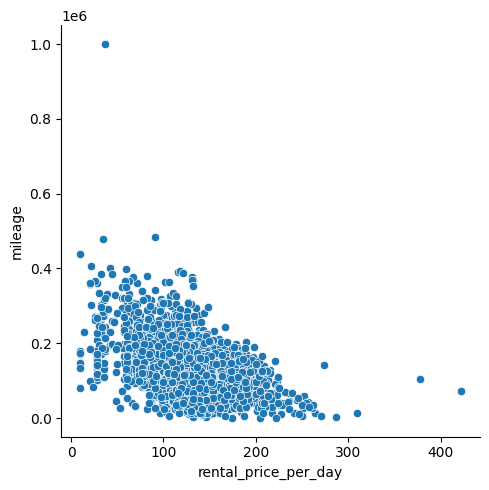

In [ ]:
# Plot Price / Mileage
sns.relplot(x="rental_price_per_day", y="mileage", data=price)

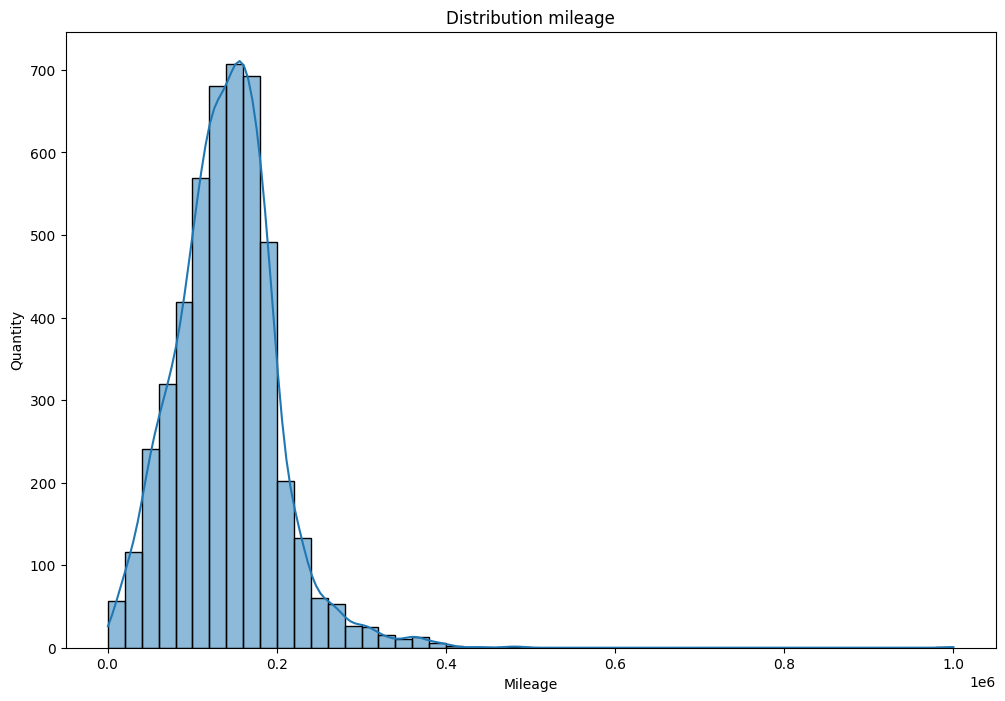

In [ ]:
# mileage distribution
plt.figure(figsize=(12, 8))
sns.histplot(price['mileage'], bins=50, kde=True)
plt.title('Distribution mileage')
plt.xlabel('Mileage')
plt.ylabel('Quantity')
plt.show()

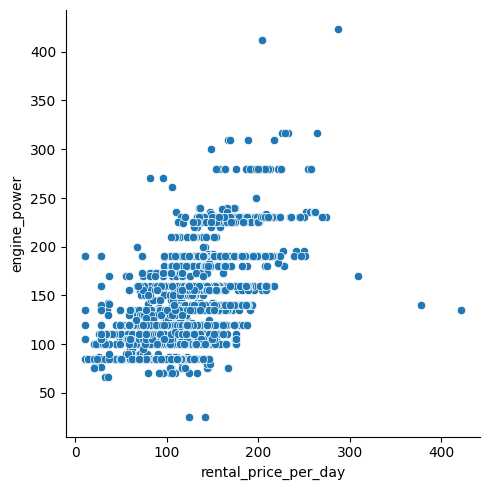

In [ ]:
sns.relplot(x="rental_price_per_day", y="engine_power", data=price)

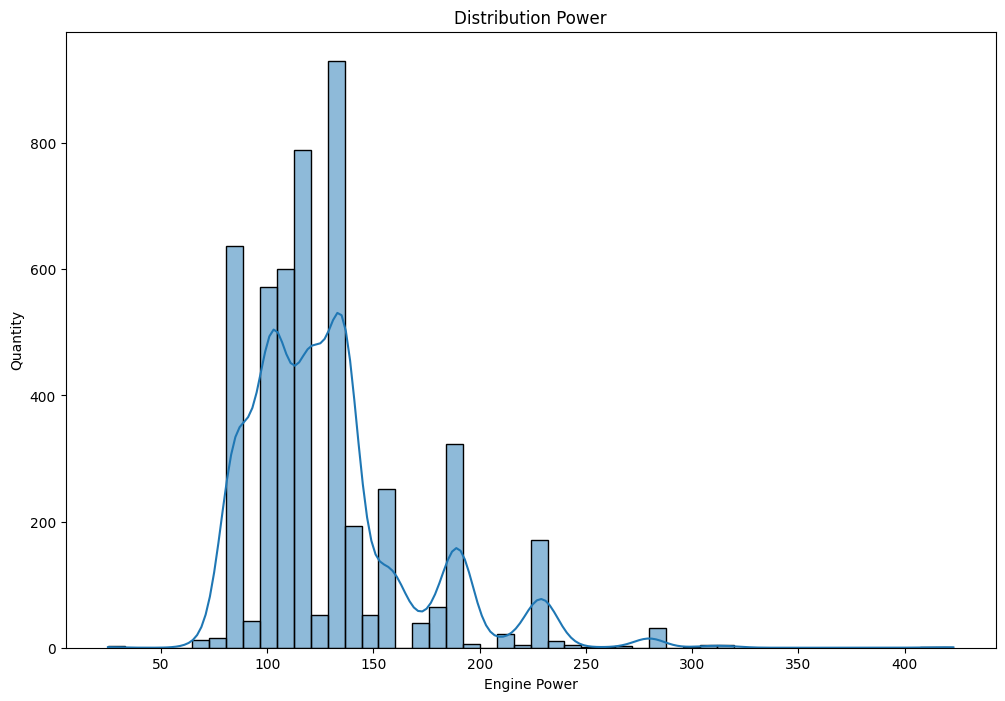

In [ ]:
# Power distribution
plt.figure(figsize=(12, 8))
sns.histplot(price['engine_power'], bins=50, kde=True)
plt.title('Distribution Power')
plt.xlabel('Engine Power')
plt.ylabel('Quantity')
plt.show()

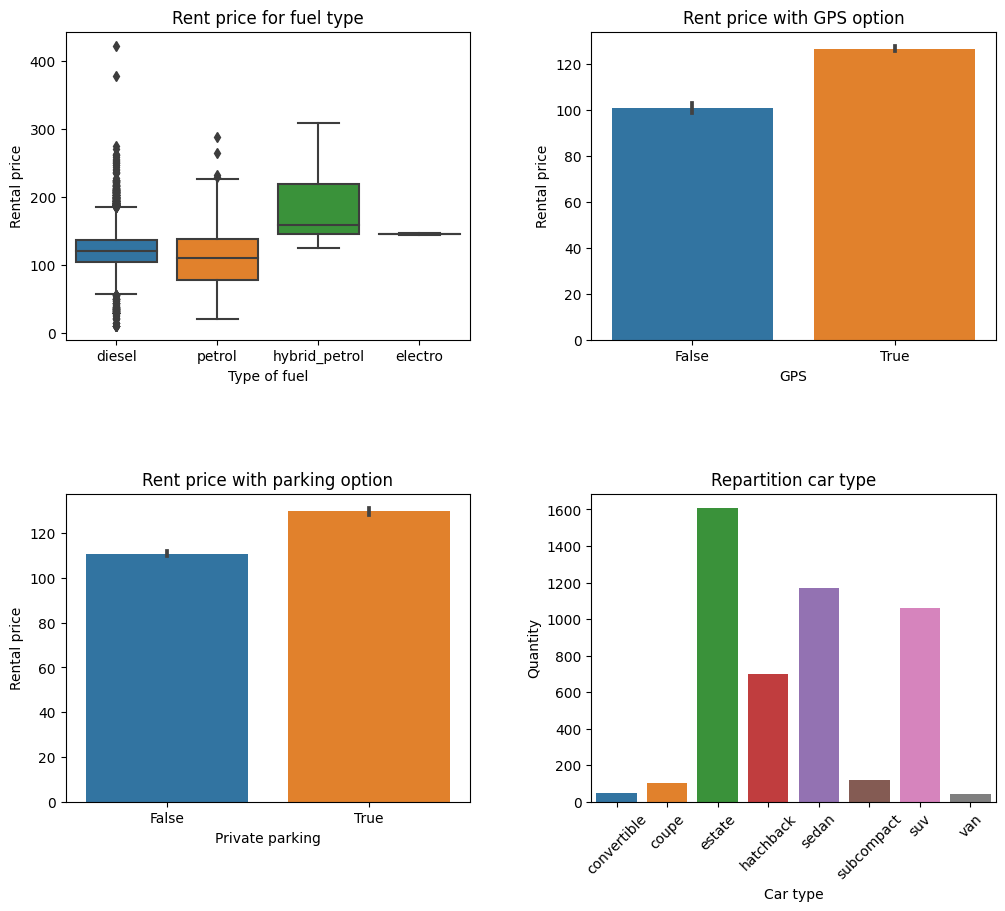

In [ ]:
# Creation table for figure
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Fisrt figure
sns.boxplot(data=price, x='fuel', y='rental_price_per_day', ax=axes[0, 0])
axes[0, 0].set_title('Rent price for fuel type')
axes[0, 0].set_xlabel('Type of fuel')
axes[0, 0].set_ylabel('Rental price')

# Second figure
sns.barplot(data=price, x='has_gps', y='rental_price_per_day', ax=axes[0, 1])
axes[0, 1].set_title('Rent price with GPS option')
axes[0, 1].set_xlabel('GPS')
axes[0, 1].set_ylabel('Rental price')

# Third figure
sns.barplot(data=price, x='private_parking_available', y='rental_price_per_day', ax=axes[1, 0])
axes[1, 0].set_title('Rent price with parking option')
axes[1, 0].set_xlabel('Private parking')
axes[1, 0].set_ylabel('Rental price')

# Fourth figure
sns.countplot(data=price, x='car_type', ax=axes[1, 1])
axes[1, 1].set_title('Repartition car type')
axes[1, 1].set_xlabel('Car type')
axes[1, 1].set_ylabel('Quantity')
axes[1, 1].tick_params(axis='x', rotation=45)

# Space between figure
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# See figure
plt.show()

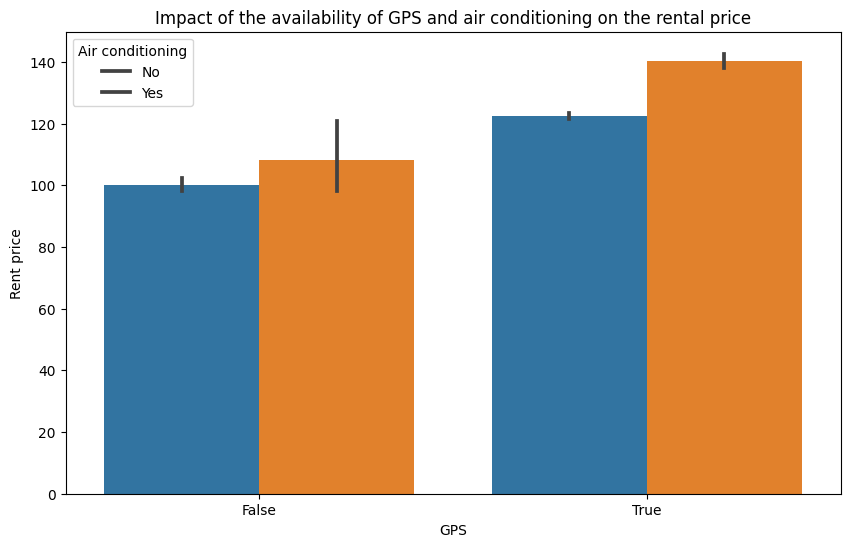

In [ ]:
# air conditioning and GPS impact on price
plt.figure(figsize=(10, 6))
sns.barplot(data=price, x='has_gps', y='rental_price_per_day', hue='has_air_conditioning')
plt.title('Impact of the availability of GPS and air conditioning on the rental price')
plt.xlabel('GPS')
plt.ylabel('Rent price')
plt.legend(title='Air conditioning', labels=['No', 'Yes'])
plt.show()

In [ ]:
fig = px.histogram(price, x = 'rental_price_per_day', title = 'Price repartition')
fig.show()

In [ ]:
# Box rental price
fig = px.box(price, y='rental_price_per_day', title='Rental price per day')
fig.show()

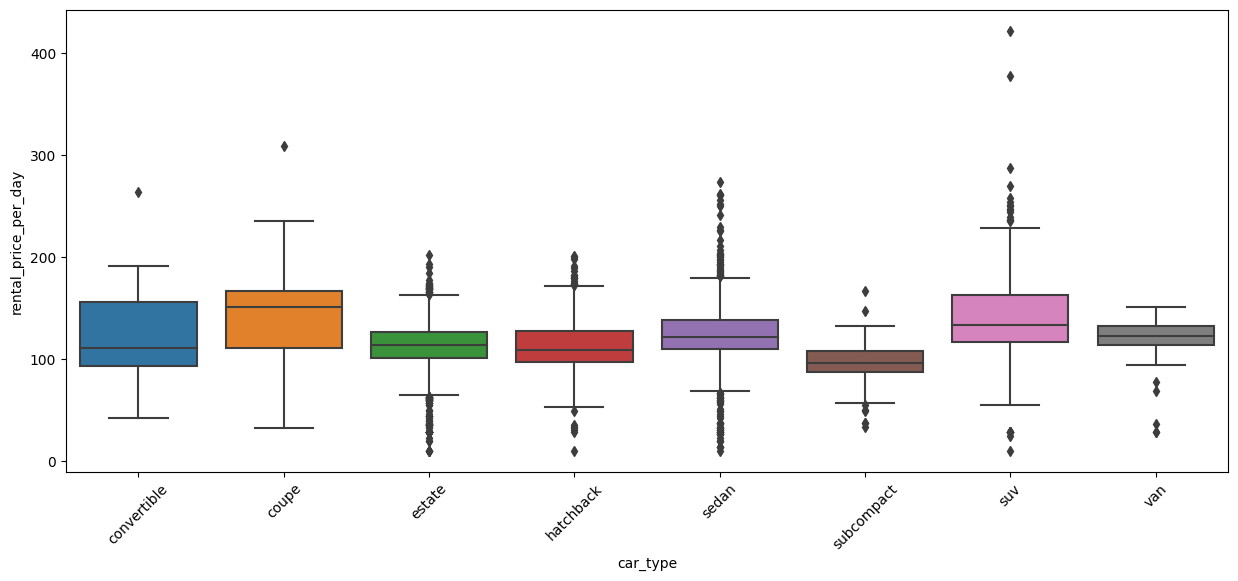

In [ ]:
# distribution price by car type
plt.figure(figsize=(15, 6))
sns.boxplot(data=price, x='car_type', y='rental_price_per_day')
plt.xticks(rotation=45);
plt.show()

In [29]:
# Drop outliers per type of car

grouped = price.groupby('car_type')

# Define a function to detect outliers using quartiles
def detect_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data >= lower_bound) & (data <= upper_bound)

# Apply function to each subgroup
outliers_mask = grouped['rental_price_per_day'].apply(detect_outliers)

# Apply the mask
filtered_dataset = price[outliers_mask]

# Reset index
filtered_dataset = filtered_dataset.reset_index(drop=True)

# New dataset
filtered_dataset.head()

<ipython-input-29-a1ba90be00eb>:15: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  outliers_mask = grouped['rental_price_per_day'].apply(detect_outliers)


,Unnamed: 0,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,0,Citroën,140411.0,100.0,diesel,black,convertible,True,True,False,False,True,True,True,106
1,2,Citroën,183297.0,120.0,diesel,white,convertible,False,False,False,False,True,False,True,101
2,3,Citroën,128035.0,135.0,diesel,red,convertible,True,True,False,False,True,True,True,158
3,4,Citroën,97097.0,160.0,diesel,silver,convertible,True,True,False,False,False,True,True,183
4,5,Citroën,152352.0,225.0,petrol,black,convertible,True,True,False,False,True,True,True,131


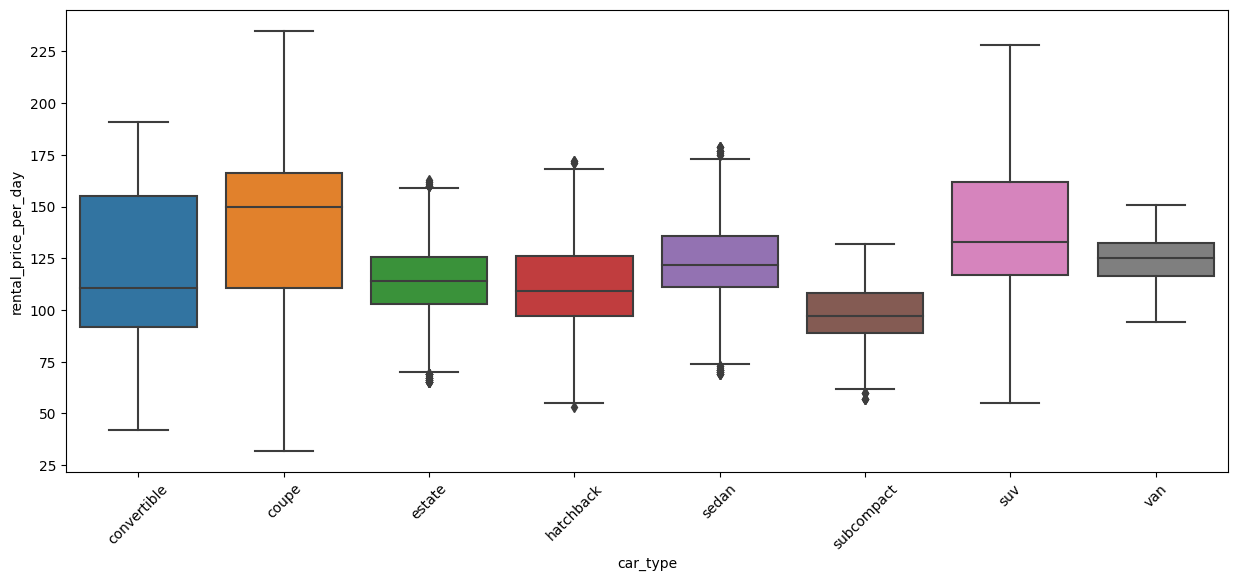

In [30]:
# distribution price by car type
plt.figure(figsize=(15, 6))
sns.boxplot(data=filtered_dataset, x='car_type', y='rental_price_per_day')
plt.xticks(rotation=45);
plt.show()

<ipython-input-74-d565745aac83>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



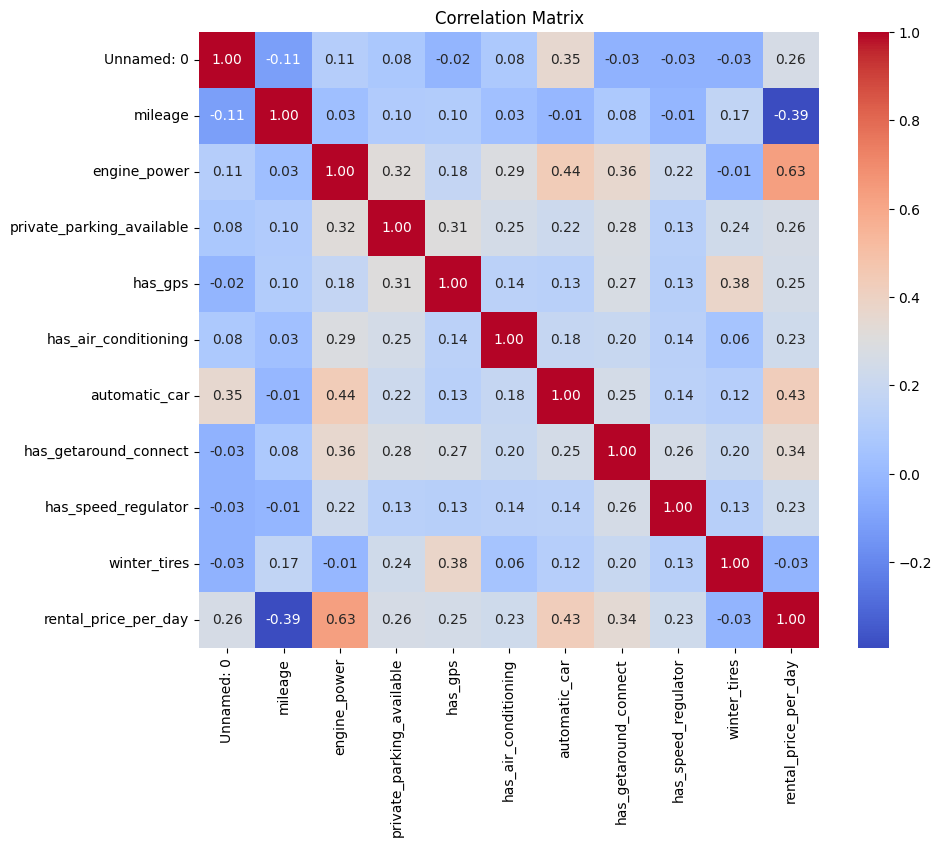

In [ ]:
# Correlation
correlation_matrix = filtered_dataset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Machine learning

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
filtered_dataset.shape

(4593, 15)

In [ ]:
filtered_dataset.columns

Index(['Unnamed: 0', 'model_key', 'mileage', 'engine_power', 'fuel',
       'paint_color', 'car_type', 'private_parking_available', 'has_gps',
       'has_air_conditioning', 'automatic_car', 'has_getaround_connect',
       'has_speed_regulator', 'winter_tires', 'rental_price_per_day'],
      dtype='object')

## 1)  Baseline Linear regression with Engine Power

In [ ]:
# Separate target variable Y from features X
print("Separating labels from features...")
features_list = ["engine_power"]
target_variable = "rental_price_per_day"

X = filtered_dataset.loc[:,features_list]
Y = filtered_dataset.loc[:,target_variable]

print("...Done.")
print()

print('Y : ')
print(Y.head())
print()
print('X :')
print(X.head())

Separating labels from features...
...Done.

Y : 
0    106
1    101
2    158
3    183
4    131
Name: rental_price_per_day, dtype: int64

X :
   engine_power
0         100.0
1         120.0
2         135.0
3         160.0
4         225.0


In [ ]:
# Divide dataset Train set & Test set
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [ ]:
# Normalization train set
print("Preprocessing X_train...")
print(X_train.head())
print()

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
print("...Done!")
print(X_train[0:5,:]) # X_train is now a numpy array
print()

Preprocessing X_train...
      engine_power
4165         110.0
2465         160.0
452          120.0
4441         135.0
4221         100.0

...Done!
[[-0.48491155]
 [ 0.86740208]
 [-0.21444882]
 [ 0.19124527]
 [-0.75537427]]



In [ ]:
# Normalization test set
print("Preprocessing X_test...")
print(X_test.head())
print()
X_test = scaler.transform(X_test)
print("...Done!")
print(X_test[0:5,:])
print()

Preprocessing X_test...
      engine_power
2472         120.0
3255         150.0
3546         105.0
727          135.0
1697          85.0

...Done!
[[-0.21444882]
 [ 0.59693936]
 [-0.62014291]
 [ 0.19124527]
 [-1.16106836]]



In [ ]:
# Train model
print("Train model...")
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


In [ ]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = regressor.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[113.5462325  137.79373276 118.39573255 ... 111.12148248 118.39573255
 118.39573255]



In [ ]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = regressor.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[118.39573255 132.9442327  111.12148248 125.66998263 101.42248238
 125.66998263 111.12148248 108.69673245 101.42248238 118.39573255
 118.39573255 125.66998263 101.42248238 111.12148248 135.36898273
 152.34223291 118.39573255 118.39573255 108.69673245 118.39573255
 101.42248238 101.42248238 125.66998263 152.34223291 128.09473265
 111.12148248 125.66998263 112.09138249 101.42248238 113.5462325
 118.39573255 111.12148248 128.09473265 142.64323281 128.09473265
 195.98773336 111.12148248 151.8572829  137.79373276 128.09473265
 152.34223291 125.66998263 101.42248238 125.66998263 111.12148248
 111.12148248 118.39573255 126.63988264 113.5462325  137.79373276
 108.69673245 111.12148248 108.69673245 118.39573255 108.69673245
 123.2452326  111.12148248 137.79373276 132.9442327  111.12148248
 152.34223291 125.66998263 142.64323281 111.12148248 118.39573255
 118.39573255 108.69673245 147.49273286 112.09138249 111.12148248
 101.42248238 118.39573255 111.12148248 1

In [ ]:
# Print R^2 scores
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.41528089802123247
R2 score on test set :  0.3311939676653678


In [ ]:
# Visualize the model
# Visualize predictions on training Set
fig = px.scatter(x = X_train.flatten().tolist(), y = Y_train, title = "training set")
fig.add_trace(go.Scatter(x = X_train.flatten().tolist(), y = Y_train_pred, name = "linear regression"))
fig.show()

# Visualize predictions on test Set
fig = px.scatter(x = X_test.flatten().tolist(), y = Y_test, title = "test set")
fig.add_trace(go.Scatter(x = X_test.flatten().tolist(), y = Y_test_pred, name = "linear regression"))
fig.show()

## 2) Multivariate linear regression Engine power & mileage

In [ ]:
# Separate target variable Y from features X
print("Separating labels from features...")
features_list = ["mileage", "engine_power"]
target_variable = "rental_price_per_day"

X = filtered_dataset.loc[:,features_list]
Y = filtered_dataset.loc[:,target_variable]

print("...Done.")
print()

print('Y : ')
print(Y.head())
print()
print('X :')
print(X.head())

Separating labels from features...
...Done.

Y : 
0    106
1    101
2    158
3    183
4    131
Name: rental_price_per_day, dtype: int64

X :
    mileage  engine_power
0  140411.0         100.0
1  183297.0         120.0
2  128035.0         135.0
3   97097.0         160.0
4  152352.0         225.0


In [ ]:
# Divide dataset Train set & Test set
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [ ]:
# Normalization train set
print("Preprocessing X_train...")
print(X_train.head())
print()

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
print("...Done!")
print(X_train[0:5,:]) # X_train is now a numpy array
print()

Preprocessing X_train...
       mileage  engine_power
4165  195647.0         110.0
2465  170871.0         160.0
452   307725.0         120.0
4441  131760.0         135.0
4221   81593.0         100.0

...Done!
[[ 1.02273656 -0.48491155]
 [ 0.57360765  0.86740208]
 [ 3.05443941 -0.21444882]
 [-0.1353801   0.19124527]
 [-1.04478638 -0.75537427]]



In [ ]:
# Normalization test set
print("Preprocessing X_test...")
print(X_test.head())
print()
X_test = scaler.transform(X_test)
print("...Done!")
print(X_test[0:5,:])
print()

Preprocessing X_test...
       mileage  engine_power
2472  207133.0         120.0
3255  171555.0         150.0
3546   89016.0         105.0
727   162609.0         135.0
1697  127723.0          85.0

...Done!
[[ 1.23094994 -0.21444882]
 [ 0.58600692  0.59693936]
 [-0.91022536 -0.62014291]
 [ 0.42383759  0.19124527]
 [-0.20856114 -1.16106836]]



In [ ]:
# Train model
print("Train model...")
regressor_multi = LinearRegression()
regressor_multi.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


In [ ]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = regressor_multi.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[101.90695703 131.53899569  83.93047062 ... 113.80644126 107.91113946
 115.46129008]



In [ ]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = regressor_multi.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[104.47540938 126.48493906 121.22812474 120.94053825 103.49388348
 132.68680553 122.37534243  95.64400215 112.53723483 107.60375783
 120.14349862 137.80016531  97.24882828 100.24733721 115.24290431
 146.09845248 112.03025753 121.55827108 110.71407584 115.59710987
 106.20701143 107.09586515 118.24701737 159.80093322 130.50466559
 130.30252061 120.01818912 103.82017952  98.62602053 110.58471827
 129.9409051  110.86272603 140.16563956 144.2920941  148.4332863
 202.04717073 108.42899879 140.85107758 147.10680295 122.90978634
 156.43872964 114.5619099  108.5034892  121.01100115  99.9689577
  97.54932304 106.53619386 119.96494941 136.5902253  133.66309465
  97.95824883 116.23179465  97.43416825 121.31154881 112.56571826
 105.81964547 114.21778119 133.70108335 125.77785919 111.49239883
 161.00350002 148.92023188 158.75067237 115.42933457 120.10162936
 120.79400393 103.71986727 159.11047028 101.47979009 105.89131325
 102.91710892 113.41949995 109.69773944 12

In [ ]:
# Print R^2 scores
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.5791772442690839
R2 score on test set :  0.5194639369618825


## 3) Multivariate linear regression all variable

In [38]:
useless_col = 'Unnamed: 0'
filtered_dataset = filtered_dataset.drop(useless_col, axis = 1)

In [39]:
filtered_dataset.columns

Index(['model_key', 'mileage', 'engine_power', 'fuel', 'paint_color',
       'car_type', 'private_parking_available', 'has_gps',
       'has_air_conditioning', 'automatic_car', 'has_getaround_connect',
       'has_speed_regulator', 'winter_tires', 'rental_price_per_day'],
      dtype='object')

In [ ]:
# Divide dataset Train set & Test set
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [ ]:
# Separate target variable Y from features X
print("Separating labels from features...")
target_variable = "rental_price_per_day"

X = filtered_dataset.drop(target_variable, axis = 1)
Y = filtered_dataset.loc[:,target_variable]

print("...Done.")
print()

print('Y : ')
print(Y.head())
print()
print('X :')
print(X.head())

Separating labels from features...
...Done.

Y : 
0    106
1    101
2    158
3    183
4    131
Name: rental_price_per_day, dtype: int64

X :
  model_key   mileage  engine_power    fuel paint_color     car_type  \
0   Citroën  140411.0         100.0  diesel       black  convertible   
1   Citroën  183297.0         120.0  diesel       white  convertible   
2   Citroën  128035.0         135.0  diesel         red  convertible   
3   Citroën   97097.0         160.0  diesel      silver  convertible   
4   Citroën  152352.0         225.0  petrol       black  convertible   

   private_parking_available  has_gps  has_air_conditioning  automatic_car  \
0                       True     True                 False          False   
1                      False    False                 False          False   
2                       True     True                 False          False   
3                       True     True                 False          False   
4                       True     Tru

In [ ]:
# Automatically detect names of numeric/categorical columns
numeric_features = []
categorical_features = []
for i,t in X.dtypes.iteritems():
    if ('float' in str(t)) or ('int' in str(t)) :
        numeric_features.append(i)
    else :
        categorical_features.append(i)

print('Found numeric features ', numeric_features)
print('Found categorical features ', categorical_features)

Found numeric features  ['mileage', 'engine_power']
Found categorical features  ['model_key', 'fuel', 'paint_color', 'car_type', 'private_parking_available', 'has_gps', 'has_air_conditioning', 'automatic_car', 'has_getaround_connect', 'has_speed_regulator', 'winter_tires']


<ipython-input-121-0f0a515c43b5>:4: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



In [ ]:
# Create pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Create pipeline for categorical features
categorical_transformer = Pipeline(
    steps=[
    ('encoder', OneHotEncoder(drop='first'))
    ])

In [ ]:
# ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
# Preprocessings on train set
print("Performing preprocessings on train set...")
print(X_train.head())
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print(X_train[0:5])
print()

# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test.head())
X_test = preprocessor.transform(X_test)
print('...Done.')
print(X_test[0:5,:])
print()

Performing preprocessings on train set...
     model_key   mileage  engine_power    fuel paint_color   car_type  \
1660       BMW   34801.0          85.0  diesel       black  hatchback   
1501   Renault  174015.0         120.0  diesel        grey     estate   
4312       BMW  132485.0         135.0  diesel       white        suv   
1241   Renault  188567.0         135.0  diesel       black     estate   
2997   Peugeot  199074.0         100.0  diesel       black      sedan   

      private_parking_available  has_gps  has_air_conditioning  automatic_car  \
1660                      False    False                 False          False   
1501                       True     True                 False          False   
4312                       True     True                 False          False   
1241                      False     True                 False          False   
2997                      False    False                 False          False   

      has_getaround_connect  has

In [ ]:
# Train model
print("Train model...")
regressor_all = LinearRegression()
regressor_all.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


In [ ]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = regressor_all.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[118.67930515 114.72529002 132.49437063 ... 159.38830549 124.47279744
 116.53313586]



In [ ]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = regressor_all.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[131.36381236 129.24368424  99.26099103 112.68775637 113.42253941
 116.08053573 146.37297335 107.38132232 181.9978368  140.97859168
 117.74257563 100.28006875 110.18864051 125.94454863 107.61947555
 108.39343978 117.76743008 126.78907252 136.23136414 168.240009
 105.0457093  143.07660878 122.37524338 152.20439015 125.48363459
 130.47719506 106.04898966  99.02733444  91.5153842   45.3233029
 166.42879752 104.35786363  94.85897584 130.84569974 104.27014346
 100.23819223 142.47865248 112.25387933 130.75913493 116.77006971
 108.00212349 132.01529585  92.46502622  92.91525839 114.58702153
 153.82460436 126.43086113 104.33331084 108.3665749  102.08980175
  72.35715454 181.53037295  89.56635996 114.17083483 160.01900807
 117.28751192  96.31251037 130.01097867  88.11174887 135.79121262
 116.95566822 140.33887396 130.84646349 145.86959662 132.67708057
 129.67796942 158.6615119  137.49362619 139.59604924 109.86132195
  91.43094258 135.63661035 103.2393894  101

In [ ]:
# Print R^2 scores
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.7374364499097219
R2 score on test set :  0.71968135398622


In [ ]:
regressor_all.coef_

array([-11.17893623,  11.22809785,   4.09424794,  -1.8870522 ,
        -3.36306223,   4.41953476, -37.74724155, -17.23670372,
       -65.19855925,   7.50581735,   0.78980499,   5.94188456,
        15.9111902 ,  14.00349126, -12.15022126,  21.26243294,
       -10.72799303,  -0.75015088,  14.73116763,   6.14488237,
        22.25051567,   9.95062594,  22.75413081,  15.55104903,
        16.90485495,  23.31524362,  -2.54302348,  40.65992709,
       -16.76643123,   1.48986847,  -0.2818987 ,   2.16817571,
       -19.00873689,   0.36045895,   0.08263722,  -0.21702443,
         0.1357462 ,   5.01587635,   4.78109685,  -6.72738322,
        -8.38225217,  -1.07036874,  -7.51548227,   6.50405145,
       -13.94503547,   0.0908834 ,   9.41557828,   0.81164093,
         4.08717227,   5.24181614,   4.42907486,  -5.48320803])

In [ ]:
column_names = []
for name, pipeline, features_list in preprocessor.transformers_: # loop over pipelines
    if name == 'num': # if pipeline is for numeric variables
        features = features_list # just get the names of columns to which it has been applied
    else: # if pipeline is for categorical variables
        features = pipeline.named_steps['encoder'].get_feature_names_out() # get output columns names from OneHotEncoder
    column_names.extend(features) # concatenate features names

print("Names of columns corresponding to each coefficient: ", column_names)

Names of columns corresponding to each coefficient:  ['mileage', 'engine_power', 'model_key_Audi', 'model_key_BMW', 'model_key_Citroën', 'model_key_Ferrari', 'model_key_Fiat', 'model_key_Ford', 'model_key_Honda', 'model_key_KIA Motors', 'model_key_Lamborghini', 'model_key_Maserati', 'model_key_Mercedes', 'model_key_Mitsubishi', 'model_key_Nissan', 'model_key_Opel', 'model_key_PGO', 'model_key_Peugeot', 'model_key_Porsche', 'model_key_Renault', 'model_key_SEAT', 'model_key_Subaru', 'model_key_Suzuki', 'model_key_Toyota', 'model_key_Volkswagen', 'model_key_Yamaha', 'fuel_electro', 'fuel_hybrid_petrol', 'fuel_petrol', 'paint_color_black', 'paint_color_blue', 'paint_color_brown', 'paint_color_green', 'paint_color_grey', 'paint_color_orange', 'paint_color_red', 'paint_color_silver', 'paint_color_white', 'car_type_coupe', 'car_type_estate', 'car_type_hatchback', 'car_type_sedan', 'car_type_subcompact', 'car_type_suv', 'car_type_van', 'private_parking_available_True', 'has_gps_True', 'has_air

In [ ]:
# Create a pandas DataFrame
coefs = pd.DataFrame(index = column_names, data = regressor_all.coef_.transpose(), columns=["coefficients"])
coefs

,coefficients
mileage,-11.178936
engine_power,11.228098
model_key_Audi,4.094248
model_key_BMW,-1.887052
model_key_Citroën,-3.363062
model_key_Ferrari,4.419535
model_key_Fiat,-37.747242
model_key_Ford,-17.236704
model_key_Honda,-65.198559
model_key_KIA Motors,7.505817


In [ ]:
# Compute abs() and sort values
feature_importance = abs(coefs).sort_values(by = 'coefficients')
feature_importance

,coefficients
paint_color_orange,0.082637
private_parking_available_True,0.090883
paint_color_silver,0.135746
paint_color_red,0.217024
paint_color_blue,0.281899
paint_color_grey,0.360459
model_key_Peugeot,0.750151
model_key_Lamborghini,0.789805
has_air_conditioning_True,0.811641
car_type_sedan,1.070369


In [ ]:
# Plot coefficients
fig = px.bar(feature_importance, orientation = 'h')
fig.update_layout(showlegend = False,
                  margin = {'l': 120} # to avoid cropping of column names
                 )
fig.show()

## 4) Regularization model

In [32]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score, GridSearchCV

In [12]:
filtered_dataset.columns

Index(['Unnamed: 0', 'model_key', 'mileage', 'engine_power', 'fuel',
       'paint_color', 'car_type', 'private_parking_available', 'has_gps',
       'has_air_conditioning', 'automatic_car', 'has_getaround_connect',
       'has_speed_regulator', 'winter_tires', 'rental_price_per_day'],
      dtype='object')

### Ridge

In [ ]:
# Separate target variable Y from features X
print("Separating labels from features...")
target_variable = "rental_price_per_day"

X = filtered_dataset.drop(target_variable, axis = 1)
Y = filtered_dataset.loc[:,target_variable]

print("...Done.")
print()

print('Y : ')
print(Y.head())
print()
print('X :')
print(X.head())

Separating labels from features...
...Done.

Y : 
0    106
1    101
2    158
3    183
4    131
Name: rental_price_per_day, dtype: int64

X :
  model_key   mileage  engine_power    fuel paint_color     car_type  \
0   Citroën  140411.0         100.0  diesel       black  convertible   
1   Citroën  183297.0         120.0  diesel       white  convertible   
2   Citroën  128035.0         135.0  diesel         red  convertible   
3   Citroën   97097.0         160.0  diesel      silver  convertible   
4   Citroën  152352.0         225.0  petrol       black  convertible   

   private_parking_available  has_gps  has_air_conditioning  automatic_car  \
0                       True     True                 False          False   
1                      False    False                 False          False   
2                       True     True                 False          False   
3                       True     True                 False          False   
4                       True     Tru

In [ ]:
# Divide dataset Train set & Test set
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [ ]:
# Automatically detect names of numeric/categorical columns
numeric_features = []
categorical_features = []
for i,t in X.dtypes.iteritems():
    if ('float' in str(t)) or ('int' in str(t)) :
        numeric_features.append(i)
    else :
        categorical_features.append(i)

print('Found numeric features ', numeric_features)
print('Found categorical features ', categorical_features)

Found numeric features  ['mileage', 'engine_power']
Found categorical features  ['model_key', 'fuel', 'paint_color', 'car_type', 'private_parking_available', 'has_gps', 'has_air_conditioning', 'automatic_car', 'has_getaround_connect', 'has_speed_regulator', 'winter_tires']


<ipython-input-138-0f0a515c43b5>:4: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



In [ ]:
# Create pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Create pipeline for categorical features
categorical_transformer = Pipeline(
    steps=[
    ('encoder', OneHotEncoder(drop='first'))
    ])

In [ ]:
# ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
# Preprocessings on train set
print("Performing preprocessings on train set...")
print(X_train.head())
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print(X_train[0:5])
print()

# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test.head())
X_test = preprocessor.transform(X_test)
print('...Done.')
print(X_test[0:5,:])
print()

Performing preprocessings on train set...
     model_key   mileage  engine_power    fuel paint_color   car_type  \
3338   Citroën  147678.0         120.0  diesel       black      sedan   
901       Audi  115902.0         160.0  diesel        grey     estate   
1629   Peugeot  304661.0         100.0  diesel        grey     estate   
1750   Citroën  186656.0         105.0  diesel       black  hatchback   
2985      Audi  133103.0         190.0  diesel       green      sedan   

      private_parking_available  has_gps  has_air_conditioning  automatic_car  \
3338                      False     True                 False          False   
901                       False     True                 False          False   
1629                       True     True                  True          False   
1750                      False    False                 False          False   
2985                       True     True                 False          False   

      has_getaround_connect  has

In [ ]:
# Perform grid search
print("Grid search...")
ridge = Ridge()
# Grid of values to be tested
params = {
    'alpha': [0.0, 0.1, 0.5, 1.0]
}
gridsearch = GridSearchCV(ridge, param_grid = params, cv = 5)
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best R2 score : ", gridsearch.best_score_)

Grid search...
...Done.
Best hyperparameters :  {'alpha': 1.0}
Best R2 score :  0.7290637395864744


In [ ]:
# Print R^2 scores
print("R2 score on training set : ", gridsearch.score(X_train, Y_train))
print("R2 score on test set : ", gridsearch.score(X_test, Y_test))

R2 score on training set :  0.7416106736957435
R2 score on test set :  0.7033094878411943


### Lasso

In [ ]:
# Separate target variable Y from features X
print("Separating labels from features...")
target_variable = "rental_price_per_day"

X = filtered_dataset.drop(target_variable, axis = 1)
Y = filtered_dataset.loc[:,target_variable]

print("...Done.")
print()

print('Y : ')
print(Y.head())
print()
print('X :')
print(X.head())

Separating labels from features...
...Done.

Y : 
0    106
1    101
2    158
3    183
4    131
Name: rental_price_per_day, dtype: int64

X :
  model_key   mileage  engine_power    fuel paint_color     car_type  \
0   Citroën  140411.0         100.0  diesel       black  convertible   
1   Citroën  183297.0         120.0  diesel       white  convertible   
2   Citroën  128035.0         135.0  diesel         red  convertible   
3   Citroën   97097.0         160.0  diesel      silver  convertible   
4   Citroën  152352.0         225.0  petrol       black  convertible   

   private_parking_available  has_gps  has_air_conditioning  automatic_car  \
0                       True     True                 False          False   
1                      False    False                 False          False   
2                       True     True                 False          False   
3                       True     True                 False          False   
4                       True     Tru

In [ ]:
# Divide dataset Train set & Test set
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [ ]:
# Automatically detect names of numeric/categorical columns
numeric_features = []
categorical_features = []
for i,t in X.dtypes.iteritems():
    if ('float' in str(t)) or ('int' in str(t)) :
        numeric_features.append(i)
    else :
        categorical_features.append(i)

print('Found numeric features ', numeric_features)
print('Found categorical features ', categorical_features)

Found numeric features  ['mileage', 'engine_power']
Found categorical features  ['model_key', 'fuel', 'paint_color', 'car_type', 'private_parking_available', 'has_gps', 'has_air_conditioning', 'automatic_car', 'has_getaround_connect', 'has_speed_regulator', 'winter_tires']


<ipython-input-148-0f0a515c43b5>:4: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



In [ ]:
# Create pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Create pipeline for categorical features
categorical_transformer = Pipeline(
    steps=[
    ('encoder', OneHotEncoder(drop='first'))
    ])

In [ ]:
# ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
# Preprocessings on train set
print("Performing preprocessings on train set...")
print(X_train.head())
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print(X_train[0:5])
print()

# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test.head())
X_test = preprocessor.transform(X_test)
print('...Done.')
print(X_test[0:5,:])
print()

Performing preprocessings on train set...
     model_key   mileage  engine_power    fuel paint_color   car_type  \
1807       BMW   72402.0          85.0  diesel        blue  hatchback   
2649   Ferrari  191668.0         180.0  diesel       black      sedan   
1781  Mercedes  123574.0         105.0  diesel       black  hatchback   
1740       BMW  123526.0          85.0  diesel        blue  hatchback   
2619   Renault  183085.0         135.0  diesel       black      sedan   

      private_parking_available  has_gps  has_air_conditioning  automatic_car  \
1807                      False     True                 False          False   
2649                       True     True                  True          False   
1781                      False     True                 False          False   
1740                      False    False                 False          False   
2619                      False     True                 False          False   

      has_getaround_connect  has

In [ ]:
# Perform grid search
print("Grid search...")
lasso = Lasso()
# Grid of values to be tested
params = {
    'alpha': [0.0, 0.1, 0.5, 1.0]
}
gridsearch_lasso = GridSearchCV(lasso, param_grid = params, cv = 5)
gridsearch_lasso.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch_lasso.best_params_)
print("Best R2 score : ", gridsearch_lasso.best_score_)

Grid search...


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: UserWarning:

With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 300561.60813885304, tolerance: 226.00949595100374

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: UserWarning:

With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 288036.5230091747, tolerance: 222.74678883974133

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:

...Done.
Best hyperparameters :  {'alpha': 0.0}
Best R2 score :  0.7226022049833457


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 368437.32094093616, tolerance: 279.2551864997278



In [ ]:
# Print R^2 scores
print("R2 score on training set : ", gridsearch_lasso.score(X_train, Y_train))
print("R2 score on test set : ", gridsearch_lasso.score(X_test, Y_test))

R2 score on training set :  0.7361285743272641
R2 score on test set :  0.7236371578664995


## 5) Random Forest

In [40]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay, RocCurveDisplay

In [41]:
filtered_dataset.columns

Index(['model_key', 'mileage', 'engine_power', 'fuel', 'paint_color',
       'car_type', 'private_parking_available', 'has_gps',
       'has_air_conditioning', 'automatic_car', 'has_getaround_connect',
       'has_speed_regulator', 'winter_tires', 'rental_price_per_day'],
      dtype='object')

In [42]:
# Separate target variable Y from features X
print("Separating labels from features...")
target_variable = "rental_price_per_day"

X = filtered_dataset.drop(target_variable, axis = 1)
Y = filtered_dataset.loc[:,target_variable]

print("...Done.")
print()

print('Y : ')
print(Y.head())
print()
print('X :')
print(X.head())

Separating labels from features...
...Done.

Y : 
0    106
1    101
2    158
3    183
4    131
Name: rental_price_per_day, dtype: int64

X :
  model_key   mileage  engine_power    fuel paint_color     car_type  \
0   Citroën  140411.0         100.0  diesel       black  convertible   
1   Citroën  183297.0         120.0  diesel       white  convertible   
2   Citroën  128035.0         135.0  diesel         red  convertible   
3   Citroën   97097.0         160.0  diesel      silver  convertible   
4   Citroën  152352.0         225.0  petrol       black  convertible   

   private_parking_available  has_gps  has_air_conditioning  automatic_car  \
0                       True     True                 False          False   
1                      False    False                 False          False   
2                       True     True                 False          False   
3                       True     True                 False          False   
4                       True     Tru

In [43]:
# Automatically detect names of numeric/categorical columns
numeric_features = []
categorical_features = []
for i,t in X.dtypes.iteritems():
    if ('float' in str(t)) or ('int' in str(t)) :
        numeric_features.append(i)
    else :
        categorical_features.append(i)

print('Found numeric features ', numeric_features)
print('Found categorical features ', categorical_features)

Found numeric features  ['mileage', 'engine_power']
Found categorical features  ['model_key', 'fuel', 'paint_color', 'car_type', 'private_parking_available', 'has_gps', 'has_air_conditioning', 'automatic_car', 'has_getaround_connect', 'has_speed_regulator', 'winter_tires']


<ipython-input-43-0f0a515c43b5>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i,t in X.dtypes.iteritems():


In [44]:
# Divide dataset Train set & Test set
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [45]:
# Create pipeline for categorical features
categorical_transformer = Pipeline(
    steps=[
    ('encoder', OneHotEncoder(drop='first'))
    ])

In [47]:
# ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

In [48]:
# Preprocessings on train set
print("Performing preprocessings on train set...")
print(X_train.head())
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print(X_train[0:5])
print()

# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test.head())
X_test = preprocessor.transform(X_test)
print('...Done.')
print(X_test[0:5,:])
print()

Performing preprocessings on train set...
     model_key   mileage  engine_power    fuel paint_color   car_type  \
1402   Renault  164060.0         120.0  diesel       brown     estate   
1736       BMW   31930.0          85.0  diesel       black  hatchback   
4437       BMW   86267.0         140.0  diesel      silver        suv   
3678    Subaru  110474.0         225.0  diesel       white        suv   
1025   Renault  181703.0         120.0  diesel        grey     estate   

      private_parking_available  has_gps  has_air_conditioning  automatic_car  \
1402                       True     True                 False          False   
1736                      False     True                 False          False   
4437                       True     True                 False          False   
3678                       True     True                  True           True   
1025                       True     True                 False          False   

      has_getaround_connect  has

In [49]:
# Perform grid search
print("Grid search...")
rf = RandomForestRegressor()

# Grid of values to be tested
params = {
    'max_depth': [4,6,8],
    'min_samples_split': [4, 6, 8],
    'n_estimators': [40, 60, 80, 100]
}
gridsearch = GridSearchCV(rf, param_grid = params, cv = 5, verbose = 2)
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best validation accuracy : ", gridsearch.best_score_)

Grid search...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END ..max_depth=4, min_samples_split=4, n_estimators=40; total time=   0.2s
[CV] END ..max_depth=4, min_samples_split=4, n_estimators=40; total time=   0.1s
[CV] END ..max_depth=4, min_samples_split=4, n_estimators=40; total time=   0.1s
[CV] END ..max_depth=4, min_samples_split=4, n_estimators=40; total time=   0.1s
[CV] END ..max_depth=4, min_samples_split=4, n_estimators=40; total time=   0.1s
[CV] END ..max_depth=4, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END ..max_depth=4, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END ..max_depth=4, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END ..max_depth=4, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END ..max_depth=4, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END ..max_depth=4, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END ..max_depth=4, min_samp

In [ ]:
# Print R^2 scores
print("R2 score on training set : ", gridsearch.score(X_train, Y_train))
print("R2 score on test set : ", gridsearch.score(X_test, Y_test))

R2 score on training set :  0.839547063053312
R2 score on test set :  0.7680664691351045


In [ ]:
from sklearn.metrics import mean_absolute_error

# Predictions on training set
print("Predictions on training set...")
Y_train_pred = gridsearch.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

# Predictions on test set
print("Predictions on test set...")
Y_test_pred = gridsearch.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

# Print MAE
print("Mean Absolute Error on training set : ", mean_absolute_error(Y_train, Y_train_pred))
print("Mean Fare on training set : ", Y_train.mean())
print()
print("Mean Absolute Error on test set : ", mean_absolute_error(Y_test, Y_test_pred))
print("Mean Fare on test set : ", Y_test.mean())
print("Standard-deviation on test set : ", Y_test.std())

Predictions on training set...
...Done.
[111.6205195  107.63734237 153.39563322 ... 120.69549013 136.95439264
 112.15965897]

Predictions on test set...
...Done.
[117.64413727 110.520612   111.06278142 114.25517262 196.89190114
 133.49745246 122.22167572 129.33857655  80.26712036  99.06264403
 155.32801424 144.61481172 128.13688608 117.85588095  99.574551
  79.76482526 147.17334043 152.05689366 106.0977851  109.20605516
 116.16166408 117.18597757 143.53619398  78.61225602  98.21665779
  99.12306486 101.20339196 113.63840629 110.68957451 111.76073304
  93.8735747  194.79134585 171.46230468 116.63450572 155.07737858
 143.33126712 114.79137523 102.2911468  149.74220901  86.21131312
 105.01035727 157.64807259 153.19527876 102.46945931 142.33402801
 129.54315508 121.77756004 110.08648865 115.62949749 124.99707017
 110.73809139 161.11826431 124.49171201 130.37482763 130.03147146
 114.20609823  92.58182796 142.91976459 148.114587   127.61576817
  98.91032751  98.51885806 142.87797439  93.3458

In [ ]:
column_names = []
for name, step, features_list in preprocessor.transformers_: # loop over steps of ColumnTransformer
    if name == 'num': # if pipeline is for numeric variables
        features = features_list # just get the names of columns to which it has been applied
    else: # if pipeline is for categorical variables
        features = step.get_feature_names_out() # get output columns names from OneHotEncoder
    column_names.extend(features) # concatenate features names

print("Names of columns corresponding to each coefficient: ", column_names)

Names of columns corresponding to each coefficient:  ['mileage', 'engine_power', 'model_key_Audi', 'model_key_BMW', 'model_key_Citroën', 'model_key_Ferrari', 'model_key_Fiat', 'model_key_Ford', 'model_key_Honda', 'model_key_KIA Motors', 'model_key_Lamborghini', 'model_key_Maserati', 'model_key_Mercedes', 'model_key_Mitsubishi', 'model_key_Nissan', 'model_key_Opel', 'model_key_PGO', 'model_key_Peugeot', 'model_key_Porsche', 'model_key_Renault', 'model_key_SEAT', 'model_key_Subaru', 'model_key_Suzuki', 'model_key_Toyota', 'model_key_Volkswagen', 'model_key_Yamaha', 'fuel_electro', 'fuel_hybrid_petrol', 'fuel_petrol', 'paint_color_black', 'paint_color_blue', 'paint_color_brown', 'paint_color_green', 'paint_color_grey', 'paint_color_orange', 'paint_color_red', 'paint_color_silver', 'paint_color_white', 'car_type_coupe', 'car_type_estate', 'car_type_hatchback', 'car_type_sedan', 'car_type_subcompact', 'car_type_suv', 'car_type_van', 'private_parking_available_True', 'has_gps_True', 'has_air

In [ ]:
# Create a pandas DataFrame
feature_importance = pd.DataFrame(index = column_names, data = gridsearch.best_estimator_.feature_importances_, columns=["feature_importances"])
feature_importance = feature_importance.sort_values(by = 'feature_importances')

In [ ]:
# Plot coefficients
fig = px.bar(feature_importance, orientation = 'h')
fig.update_layout(showlegend = False,
                  margin = {'l': 120} # to avoid cropping of column names
                 )
fig.show()

# Save best model

In [52]:
import joblib

In [55]:
# save the preprocessing
joblib.dump(preprocessor,'./encoder.joblib')
print("Preprocessing saved.")

Preprocessing saved.


In [54]:
# Save model for API
joblib.dump(gridsearch, "./model_rf.joblib")
print("Model saved.")

Model saved.
